In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv(r"C:\\Users\\User\\Desktop\\Credit_Risk_Train_data.csv")

In [3]:
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
X = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']].values
X[0:11]

array([['Male', 'No', '0', 'Graduate', 'No', 5849, 0.0, nan, 360.0, 1.0,
        'Urban'],
       ['Male', 'Yes', '1', 'Graduate', 'No', 4583, 1508.0, 128.0, 360.0,
        1.0, 'Rural'],
       ['Male', 'Yes', '0', 'Graduate', 'Yes', 3000, 0.0, 66.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '0', 'Not Graduate', 'No', 2583, 2358.0, 120.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'No', '0', 'Graduate', 'No', 6000, 0.0, 141.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '2', 'Graduate', 'Yes', 5417, 4196.0, 267.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '0', 'Not Graduate', 'No', 2333, 1516.0, 95.0,
        360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '3+', 'Graduate', 'No', 3036, 2504.0, 158.0,
        360.0, 0.0, 'Semiurban'],
       ['Male', 'Yes', '2', 'Graduate', 'No', 4006, 1526.0, 168.0, 360.0,
        1.0, 'Urban'],
       ['Male', 'Yes', '1', 'Graduate', 'No', 12841, 10968.0, 349.0,
        360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '

In [7]:
from sklearn import linear_model, preprocessing
le = preprocessing.LabelEncoder()
Gender = le.fit_transform(list(data["Gender"]))
Married = le.fit_transform(list(data["Married"]))
Dependents = le.fit_transform(list(data["Dependents"]))
Education = le.fit_transform(list(data["Education"]))
Employment = le.fit_transform(list(data["Self_Employed"]))
Application = le.fit_transform(list(data["ApplicantIncome"]))
Cincome = le.fit_transform(list(data["CoapplicantIncome"]))
LoanAmount = le.fit_transform(list(data["LoanAmount"]))
Loanterm = le.fit_transform(list(data["Loan_Amount_Term"]))
Credit = le.fit_transform(list(data["Credit_History"]))
Property = le.fit_transform(list(data["Property_Area"]))
Loan = le.fit_transform(list(data["Loan_Status"]))

In [11]:
X = list(zip(Gender,Married,Dependents,Education,Employment,Application,Cincome,LoanAmount,Loanterm,Credit,Property))
y = list(Loan)
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)

In [12]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
LoanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
predTree = LoanTree.predict(X_testset)

In [16]:
print (predTree )
print (y_testset )

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 1 0 1 0 1]
[1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0]


In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7804878048780488


In [19]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        44.1 MB

The following NEW packages will be INSTALLED:

  graphviz           conda-forge/win-64::graphviz-2.38.0-h6538335_1011
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2

The following packages will be SUPERSEDED by a higher-priority channel:

  cert

In [20]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

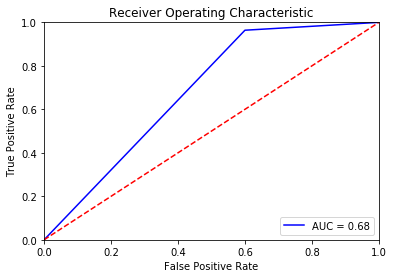

In [27]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = LoanTree.predict(X_testset)
preds = predTree
fpr, tpr, threshold = metrics.roc_curve(y_testset, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_testset, predTree, labels=[1,0]))

[[80  3]
 [24 16]]


Confusion matrix, without normalization
[[80  3]
 [24 16]]


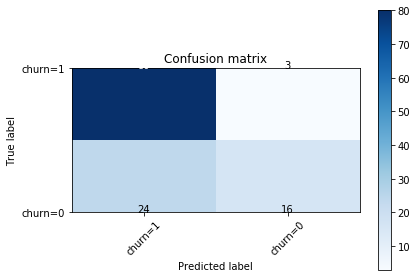

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, predTree, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [30]:
print (classification_report(y_testset, predTree))

              precision    recall  f1-score   support

           0       0.84      0.40      0.54        40
           1       0.77      0.96      0.86        83

    accuracy                           0.78       123
   macro avg       0.81      0.68      0.70       123
weighted avg       0.79      0.78      0.75       123

